In [33]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
print('libraries imported')

libraries imported


Loading and preprocessing of the Data


In [12]:
column_df=pd.read_csv('UCI HAR Dataset/features.txt', header=None,names=['features'])
column_df=column_df.features.apply(lambda x: x[2:])
column_df.iloc[100:]=column_df.iloc[100:].apply(lambda x: x[2:])
column_df

0            tBodyAcc-mean()-X
1            tBodyAcc-mean()-Y
2            tBodyAcc-mean()-Z
3             tBodyAcc-std()-X
4             tBodyAcc-std()-Y
                ...           
556        angle(tBodyGyroMean
557    angle(tBodyGyroJerkMean
558                    angle(X
559                    angle(Y
560                    angle(Z
Name: features, Length: 561, dtype: object

In [13]:
main_x_test=pd.read_fwf('UCI HAR Dataset/test/X_test.txt',header=None)
main_x_test.columns=column_df
main_x_test.head()

features,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),angle(tBodyAccMean,angle(tBodyAccJerkMean),angle(tBodyGyroMean,angle(tBodyGyroJerkMean,angle(X,angle(Y,angle(Z
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [14]:
main_df=pd.read_fwf('UCI HAR Dataset/train/X_train.txt', header=None)
main_df.columns=column_df
main_df.head()


features,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),angle(tBodyAccMean,angle(tBodyAccJerkMean),angle(tBodyGyroMean,angle(tBodyGyroJerkMean,angle(X,angle(Y,angle(Z
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [15]:
main_df.shape

(7352, 561)

In [16]:
main_y_test=pd.read_csv('UCI HAR Dataset/test/y_test.txt',header=None, names=['y'])
main_y_test.head(5)

,y
0,5
1,5
2,5
3,5
4,5


In [17]:
main_y_train=pd.read_csv('UCI HAR Dataset/train/y_train.txt',header=None, names=['y'])
main_y_train.head(5)

,y
0,5
1,5
2,5
3,5
4,5


Checking for any NaN values

In [18]:
a=main_df.isna().sum()
a

features
tBodyAcc-mean()-X          0
tBodyAcc-mean()-Y          0
tBodyAcc-mean()-Z          0
tBodyAcc-std()-X           0
tBodyAcc-std()-Y           0
                          ..
angle(tBodyGyroMean        0
angle(tBodyGyroJerkMean    0
angle(X                    0
angle(Y                    0
angle(Z                    0
Length: 561, dtype: int64

Training Model and computing precision matrix

In [35]:
X_train , X_test ,y_train,y_test=train_test_split(main_df,main_y_train,random_state=0)

grid_pram={'C':[.1,1,10,100],
          'gamma':[.01,.1,1,10]}

clf=SVC(kernel='rbf',C=100,gamma=.1)


clf.fit(X_train,y_train['y'])

prediction=clf.predict(X_test)

confusion_m=confusion_matrix(y_test,prediction)

confusion_df=pd.DataFrame(confusion_m,index=[i for i in range(1,7)],columns=[i for i in range(1,7)])
print(confusion_m)

[[305   1   2   0   0   0]
 [  0 248   0   0   0   0]
 [  0   0 240   0   0   0]
 [  0   0   4 338   8   0]
 [  0   0   1   7 327   0]
 [  0   0   5   0   0 352]]


Plotting confusion matrix as heatmap

<function matplotlib.pyplot.show(*args, **kw)>

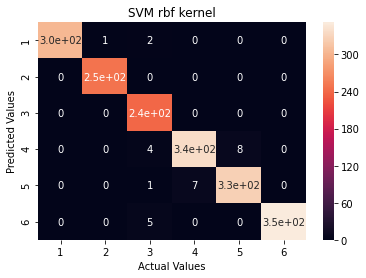

In [34]:
plt.figure
sns.heatmap(confusion_df, annot=True)
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('SVM rbf kernel')
plt.show


In [32]:
from sklearn.metrics import recall_score, precision_score, accuracy_score
print('recall score ')
print( recall_score(y_test,prediction,average=None))
print('\n precision score')
print(precision_score(y_test,prediction,average=None))
print('\n accuracy score')
print(accuracy_score(y_test,prediction))

recall score 
[0.99025974 1.         1.         0.96571429 0.9761194  0.9859944 ]

 precision score
[1.         0.99598394 0.95238095 0.97971014 0.9761194  1.        ]

 accuracy score
0.984766050054407


Prediciton for real Test Set

In [40]:
main_x_test.head()

features,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),angle(tBodyAccMean,angle(tBodyAccJerkMean),angle(tBodyGyroMean,angle(tBodyGyroJerkMean,angle(X,angle(Y,angle(Z
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [38]:
R_prediction=clf.predict(main_x_test)
R_prediction.size

2947

In [39]:
print('Accuracy score: {}'.format(accuracy_score(main_y_test,R_prediction)))

Accuracy score: 0.9521547336274178


In [52]:
activity_label=pd.read_fwf('UCI HAR Dataset/activity_labels.txt',header=None)
activity_label.columns=['value','activity']
activity_label.head(7)

,value,activity
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING
5,6,LAYING
